In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter    



In [2]:
# path = "vtaiwan.uberx"
path = "march-on.operation-marchin-orders"

df = pd.read_csv("../polis/openData/" + path + "/participants-votes.csv")

In [3]:
## deleting each row (participant) with no group + all not need columns 
df = df.dropna(how= "any", subset=['group-id'])
df = df.drop(['participant'], axis= 1)
df = df.drop(['group-id'], axis= 1)
df = df.drop(['n-comments'], axis= 1)
df = df.drop(['n-votes'], axis= 1)
df = df.drop(['n-agree'], axis= 1)
df = df.drop(['n-disagree'], axis= 1)


In [4]:
## Deleting all questions which less than 20 people answered
min_votes = 3 # the minimum votes which each col should have
rows_to_drop = []  # the rows which shall be droped 
min_len = df.shape[0] - min_votes 
for i in range(1,df.shape[1]):
    i_str = str(i)
    n_nan = sum(pd.isnull(df[i_str])) ## the number of nan's
    
    if n_nan > min_len:
        rows_to_drop.append(i_str)

# drops all the cells with to lttle information
df = df.drop(rows_to_drop, axis= 1) 




In [5]:
# converting to numpy array
data = df.values

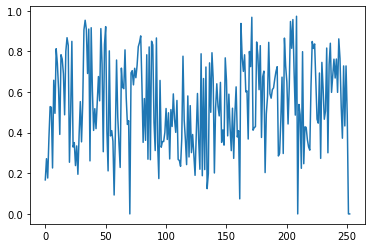

In [6]:
#plotting data

## The measurement of consentus 
std_dev = np.nanstd(data,axis=0)
plt.plot(std_dev)
plt.savefig("figures/std_dev")

In [7]:
length = data.shape[1]
print(length)

x = np.array(range(length)).reshape((-1,1))
y = std_dev


model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)




253
coefficient of determination: 0.003153115980891519


253
coefficient of determination: 0.01135674126206243
coefficients:
[0.00016113]


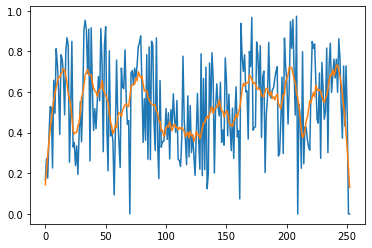

In [8]:
# smoothing data
length = data.shape[1]
print(length)

x = np.array(range(length)).reshape((-1,1))

y_smooth = savgol_filter(y,window_length = 21, polyorder = 2)


model = LinearRegression().fit(x,y_smooth)
r_sq = model.score(x, y_smooth)
print('coefficient of determination:', r_sq)

plt.close()
plt.plot(y)
plt.plot(y_smooth)
plt.savefig("figures/smooth")
intercept, coefficients = model.intercept_, model.coef_
print('coefficients:', coefficients, sep='\n')






